In [1]:
import pandas as pd

In [2]:
apps = pd.read_csv('googleplaystore.csv')
reviews = pd.read_csv('googleplaystore_user_reviews.csv')

In [3]:
# задача №1

# удаление данных, где review содержит посторонние символы (отличные от чисел)
# преобразование столбца в числа или заполнение nan
apps['Reviews'] = pd.to_numeric(apps['Reviews'], errors='coerce')
apps = apps.dropna()

# категория с наибольшим количеством отзывов 
apps.loc[apps["Reviews"] == apps["Reviews"].max(), ["Category", "Reviews"]]

,Category,Reviews
2544,SOCIAL,78158306.0


In [4]:
# задача №2

# удаляем дубликаты
apps_drop_dupl = apps.drop_duplicates(subset=['App'])

# 5% приложений с наибольшим количеством отзывов
apps_sorted = apps_drop_dupl.sort_values(by = ["Reviews"], ascending=False)
apps_sorted.reset_index(drop=True, inplace=True)

num_rows = apps_drop_dupl.shape[0]
rows_best = int(num_rows*0.05)

apps_best = apps_sorted.loc[:rows_best-1, :]

# приложение с наивысшим рейтингом среди 5% приложений с наибольшим количеством отзывов
apps_best.loc[apps_best["Rating"] == apps_best["Rating"].max(), ["App", "Rating"]]

,App,Rating
369,JW Library,4.9


In [5]:
# задача №3

# функция для преобразования числа скачиваний в число
def to_number(x):
    x_new = (
        x
        .replace(",", "")
        .replace("+", "")
        .replace("Free", "0")
    )
    return int(x_new)

In [6]:
apps["Installs"] = apps["Installs"].apply(to_number)

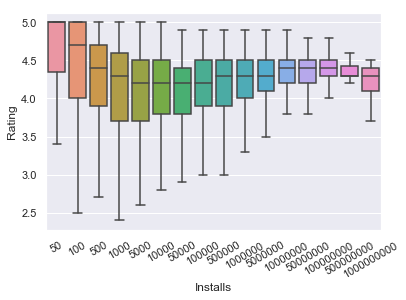

In [7]:
# график зависимости рейтинга от числа скачиваний

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
ax = sns.boxplot(x="Installs", 
                 y="Rating",
                 data=apps[apps["Installs"] > 10], 
                 showfliers = False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18a29550>]],
      dtype=object)

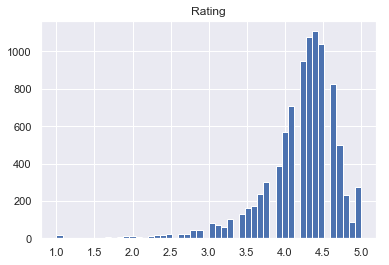

In [8]:
# задача №4
# гистограмма рейтингов приложений

apps[apps.Rating <= 5.0].hist("Rating", bins=50)

In [9]:
# задача №5

# топ-5 позитивных
reviews_pos = reviews.loc[reviews['Sentiment'] == 'Positive'] 
reviews_pos.sort_values('Sentiment_Polarity', ascending=False, inplace=True)
reviews_pos.reset_index(drop=True, inplace=True)
print('Топ-5 позитивных отзывов:\n', reviews_pos.loc[:4, ['Translated_Review']], sep='\n')
print('-----------------------------------')

# топ-5 негативных
reviews_neg = reviews.loc[reviews['Sentiment'] == 'Negative'] 
reviews_neg.sort_values('Sentiment_Polarity', inplace=True)
reviews_neg.reset_index(drop=True, inplace=True)
print('Топ-5 негативных отзывов:\n', reviews_neg.loc[:4,['Translated_Review']], sep='\n')

Топ-5 позитивных отзывов:

                                   Translated_Review
0  I like eat delicious food. That's I'm cooking ...
1  This best bank ever. Don't take word stop A+ F...
2                                Excellent material!
3                                          Excellent
4                                     It awesome!!!!
-----------------------------------
Топ-5 негативных отзывов:

                                   Translated_Review
0                                          The worst
1  Notification go away & can't find any. Very an...
2  Why would age calculator need permission manag...
3  Why ur requires storage permission!? Remove ne...
4  Notification go away & can't find any. Very an...


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [10]:
# задача №6
# категория с самыми субъективными оценками

merged_table = reviews.merge(apps, on="App", how="inner")
merged_table[["Category", "Sentiment_Subjectivity"]].groupby("Category").mean().sort_values("Sentiment_Subjectivity", ascending=False).head(1)

,Sentiment_Subjectivity
Category,
COMICS,0.579079


In [11]:
# задача №7

def is_prime(number):
    def check_div(n, d):
        if d == 1:
            return True
        elif n % d == 0:
            return False
        else:
            return(check_div(n, d - 1))
        
    if number > 1:
        return check_div(number, number - 1)
    else:
        return True

In [12]:
# тесты

numbers = [1, 3, 4, 5]

for el in numbers:
    res = is_prime(el)
    if res is True:
        print(el, ' - простое число\n')
    else:
        print(el, ' - не простое число\n')

1  - простое число

3  - простое число

4  - не простое число

5  - простое число



In [13]:
# задача №8

def first_unique(s):
    fl = True
    el = s[0]
    i = 1
    while fl is True and i < len(s):
        if (s[i] != el):
            fl = False
        else:
            el = s[i]
            i += 1;
    if (fl == True):
        return -1
    else:
        return s[i]

In [14]:
# тесты

strs = ['abc', 'aaaaa', 'a']
for el in strs:
    res = first_unique(el)
    if res == -1:
        print('Первый неповторяющийся элемент в', el,':', res)
    else:
        print('Такого элемента нет')

Такого элемента нет
Первый неповторяющийся элемент в aaaaa : -1
Первый неповторяющийся элемент в a : -1


In [15]:
# задача №9
import os
def file_numerator(basepath):
    count = 1
    for path in os.listdir(basepath):
        full_path = os.path.join(basepath, path)
    
        if os.path.isdir(full_path):
            file_numerator(full_path)
        
        if os.path.isfile(full_path):
            print (count, ',', path)
            count += 1

In [16]:
# тест
path = '/Users/liliasergeenkova/Desktop/озон'
file_numerator(path)

1 , .DS_Store
2 , Сергеенкова_Лилия_дз1.ipynb
1 , .DS_Store
2 , Oalg_cw4.pdf
3 , Oalg_cw5.pdf
4 , Cormen_Leiserson_Rivest_Stein-Introduction_to_Algorithms-RU.pdf
5 , Programming_theorem_and_problems.pdf
6 , OzAlgNotes1.pdf
7 , Oalg_cw6.pdf
8 , Oalg_cw2.pdf
9 , Oalg_cw3.pdf
10 , alg_lectures_2020.pdf
11 , Oalg_cw1.pdf
12 , notepad5.pdf
13 , DataStructuresI.pdf
14 , GXwlvy-dasgupta_2014.pdf
15 , Oalg_hw5.pdf
16 , Oalg_hw4.pdf
17 , Oalg_hw6.pdf
18 , 2max.pdf
19 , Oalg_hw3.pdf
20 , Oalg_hw2.pdf
21 , Oalg_hw1.pdf
1 , .DS_Store
1 , .DS_Store
2 , hw1.ipynb
1 , .DS_Store
1 , 6QICoUs8.png
2 , .DS_Store
3 , Сергеенкова_Лилия_experiments.ipynb
4 , knn.zip
5 , Сергеенкова_Лилия_experiments.html
1 , .DS_Store
2 , 8.jpg
3 , 9.jpg
4 , Unknown.png
5 , 10.jpg
6 , дз3.pdf
7 , 7.jpg
8 , 2.jpg
9 , 1.jpg
1 , .DS_Store
2 , task3.py
3 , task7.py
4 , task6.py
5 , task2.py
6 , task5.py
7 , task1.py
8 , task4.py
9 , Снимок экрана 2020-10-04 в 18.33.44.png
1 , check_first_sentence_is_second.py
2 , get_new_dictio

In [17]:
# задача №10

def palindrome(string):
    def check(st, first, last) :
        if (first == last):
            return True
        
        if (st[first] != st[last]) :

            return False

        if (last < first + 1) :
            return check(st, first + 1, last - 1)
        
        return True
    
    n = len(string)
    
    if (n == 0) :
        return True
    
    return check(string, 0, n - 1) 

In [18]:
# тесты

strs = ['cbc', 'abc', 'aabaa']
for el in strs:
    res = palindrome(el)
    if res is True:
        print(el, ' является палиндромом')
    else:
        print(el, ' не является палиндромом')

cbc  является палиндромом
abc  не является палиндромом
aabaa  является палиндромом


In [19]:
# задача №11

def code_of_string(string):
    s_prev = string[0]
    count = 1
    code = ''
    for i in range (1, len(string)):
        if s_prev == string[i]:
            count += 1
            if i == len(string)-1:
                code += s_prev + str(count)
        else:
            code += s_prev + str(count)
            count = 1
        s_prev = string[i]
    return code

In [20]:
# тесты

strs = ['AAACCBBBBDD', 'aaa']
for el in strs:
    res = code_of_string(el)
    print(el, ':', res)

AAACCBBBBDD : A3C2B4D2
aaa : a3


In [21]:
# задача №12

def merge_sort(arr):
    if len(arr) < 2:
        return arr
    else:
        middle = int(len(arr) / 2)
        left = merge_sort(arr[:middle])
        right = merge_sort(arr[middle:])
        return merge(left, right)

In [22]:
def merge(left, right):
    result = []
    i = 0
    j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    while i < len(left):
        result.append(left[i])
        i += 1
    while j < len(right):
        result.append(right[j])
        j += 1
    return result

In [23]:
# тесты 

arrs = [[1, 9, 4, 6, 3, 8], [9, 8, 5, 4, 3]]
for el in arrs:
    res = merge_sort(el)
    print('Исходный массив: ', el, sep = '\n')
    print('Отсортированный массив: ', res, sep = '\n')
    print('--------------------------------')

Исходный массив: 
[1, 9, 4, 6, 3, 8]
Отсортированный массив: 
[1, 3, 4, 6, 8, 9]
--------------------------------
Исходный массив: 
[9, 8, 5, 4, 3]
Отсортированный массив: 
[3, 4, 5, 8, 9]
--------------------------------
